In [1]:
import numpy as np
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import PatcherBot as pb
import pandas as pd
from glob import glob
import h5py
import os
import matplotlib.pyplot as plt


In [2]:
# def get_peak_idx(trace,samples_per_ms = 40.0):
#     peak_indices = np.where(trace==1) # All indices with value equal to 1 (high)
#     peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
#     # Note the first peak was counted in different way: it's counted because it's subtracting the last value
#     # in the list and the result is not equal to 1.
#     peak_index = peak_indices[0][peak_index]
#     # peak_indices[0]: remove tuple format
#     peak_index = peak_index/samples_per_ms
#     for idx in range(peak_index.shape[0]):
#         if peak_index[idx]>=500.0:
#             break
#         else:
#             continue
#     stim_timing = peak_index[idx]
#     return peak_index,idx,stim_timing

In [3]:
imgPath = '/Volumes/genie/BenArthur/patch-screen/bot'
rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
# imgPath = '/Volumes/Backup Plus/patch-screen/bot'
# rawPath = '/Volumes/Backup Plus/PatcherBot/raw'

In [4]:
# date_path = pb.getPathInfo(imgPath)
# datePath = []
# for date in date_path:
#     if len(date)!=14:
#         continue
#     datePath.append(date)

In [21]:
# datePath = datePath[10:]
datePath = ['2019.12.06_000']
# datePath

In [22]:
# datePath = pb.getPathInfo(imgPath)
results = {}
traces = []
traces_trigger = []
for date in datePath:
    if len(date)!=14:
        continue
    platePath = pb.getPathInfo(os.path.join(imgPath, date))
    for plate in platePath:
        cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))
        for cell in(cellPath):
            if not os.path.exists(os.path.join(rawPath, date, plate, cell)):
                continue
            print(os.path.join(rawPath, date, plate))
            daqData = os.path.join(rawPath,date,plate,cell,'camera_clamp2_000','008','Camera','daqResult.ma')
            
            if not os.path.exists(daqData):
                daqData = os.path.join(rawPath,date,plate,cell,'camera_clamp1_000','008','Camera','daqResult.ma') 
            
            if not os.path.exists(daqData):
                continue
            daqData = h5py.File(daqData,'r')
            V_SYNC = daqData['data'][()][1]
            traces.append(V_SYNC)
            traces_trigger.append(daqData['data'][()][0])
            peak_indices = np.where(V_SYNC==1)
            peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
            peak_index = peak_indices[0][peak_index]
            peak_index = peak_index/40.0 # change to ms
            results[os.path.join(rawPath, date, plate, cell)]=peak_index.shape
        print(os.path.join(rawPath, date, plate))


/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_000
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_001
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_001
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_001
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_001
/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2019.12.06_000/plate_001
/Volumes/genie/Jihong_GENIE_stuff/Patc

In [23]:
len(traces)

17

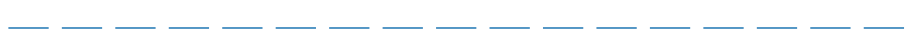

In [24]:
plt.figure(figsize=[15,30])

for i in range(len(traces)):
# for i in range(2):
    ax = plt.subplot(41,20,i+1)
    ax.plot(traces[i][:10000])
#     ax.set_ylim([-0.05, 1.05])
    ax.axis('off')
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/Frames drop issue/cam_trigger_signal.png')
plt.show()


In [13]:
ax.get_ylim()

(-214748364.75, 4509715659.75)

In [13]:
a = h5py.File(daqData,'r')

OSError: Unable to open file (unable to open file: name = '/Volumes/Backup Plus/PatcherBot/raw/2020.10.16_000/plate_000/patch_attempt_0013_000/camera_clamp1_000/008/Camera/daqResult.ma', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
len(traces)

In [20]:
dataFile = '/Volumes/Backup Plus/PatcherBot/raw/2020.10.15_000/plate_000/patch_attempt_0000_000/camera_clamp1_000/000/Clamp1.ma'

In [21]:
data = h5py.File(dataFile,'r')

In [22]:
data = data['data'][()]

In [23]:
data.shape

(3, 80000)

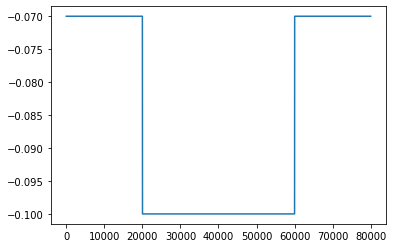

In [24]:
plt.plot(data[0])

In [ ]:
np.max(vsync)

In [ ]:
vsync = data['data'][()]

In [ ]:
vsync.shape

In [ ]:
np.max(vsync[1])

In [ ]:
peak_indices = np.where(vsync[1]==1)
peak_index = [k for k in range(peak_indices[0].shape[0]) if peak_indices[0][k]-peak_indices[0][k-1]!=1]
peak_index = peak_indices[0][peak_index]
peak_index = peak_index/40.0 # change to ms
print(peak_index.shape)

In [ ]:
for val in "string":
    if val == "i":
        print(val)
        break
    

print("The end")

In [ ]:
daqData['data'][()]

In [ ]:
data_as_dict['sweep_0001']['analogScans'][0,:]